# Assignment 5:  Due 10/7

In this assignment you will become familiar with the Pandas library through the exploration of a Nobel prize data set. 

This data set was taken from the Kaggle website (https://www.kaggle.com/). If you are interested in data science and / or analysis, this website offers tons of data sets in various formats that you can access. They even post compititions that you can enter, some with money prizes awarded.

The libraries needed for this assignment are listed below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

# 1a)

Read in the data set 'data/nobel.csv' into a DataFrame using Pandas .

In [2]:
df = pd.read_csv("data/nobel.csv")

# 1b)

Display below the output from the DataFrame functions *info*.

In [3]:
df.info

<bound method DataFrame.info of      year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
906  2016    Medicine  The Nobel Prize in Physiology or Medicine 2016   
907  2016       Peace                      The Nobel Peace Prize 2016   
908  2016     Physics                 The Nobel Prize in Physics 2016   
909  2016     Physics                 The Nobel Prize in Physics 2016   
910  2016     Physics                 The Nobel Prize in Physics 2016   

                                            motivation prize_share  \
0    "in recognition 

# 1c)

Show the first 5 listings of the dataset.

In [4]:
df.head(5)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


# Problem 2

How many null ('NaN') values there are in each *catagory*? What is the total number of Null values in the DataFrame?

In [5]:
nulls = df.isna().sum()
nulls

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

In [6]:
total = nulls.sum()
print("Total number of NaN's: " + str(total))

Total number of NaN's: 1912


# Problem 3

Make a histogram of the number of nobel prizes awarded per year. Around which decade (1900, 1910, 1920, ...) were the least amount of prizes awarded?

<IPython.core.display.Javascript object>


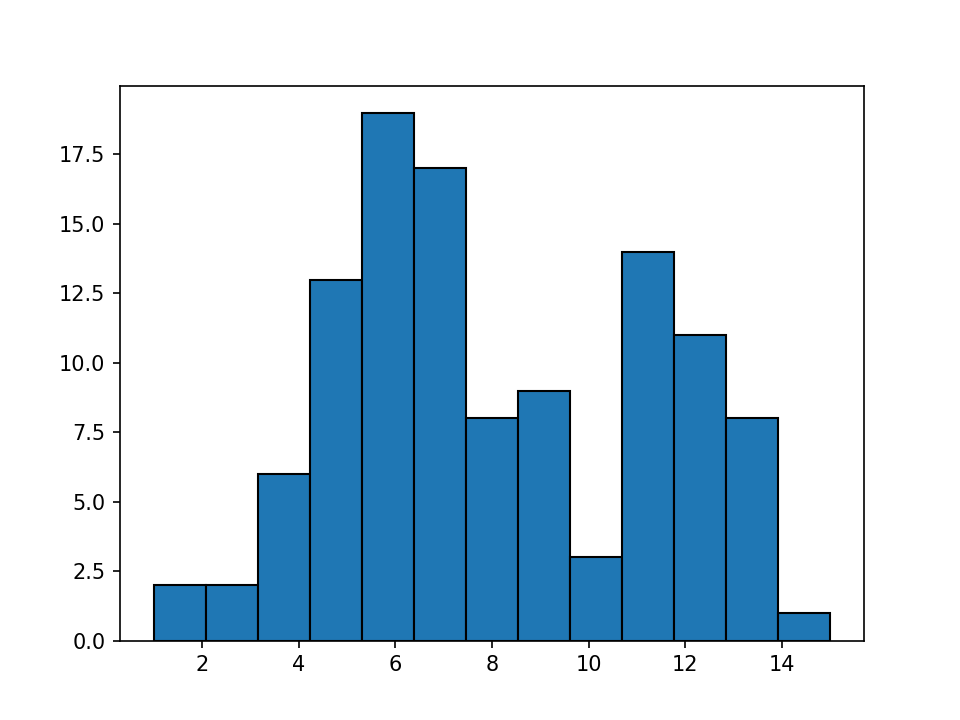

(array([ 2.,  2.,  6., 13., 19., 17.,  8.,  9.,  3., 14., 11.,  8.,  1.]),
 array([ 1.        ,  2.07692308,  3.15384615,  4.23076923,  5.30769231,
         6.38461538,  7.46153846,  8.53846154,  9.61538462, 10.69230769,
        11.76923077, 12.84615385, 13.92307692, 15.        ]),
 <a list of 13 Patch objects>)

In [7]:
hist_setup = df.groupby('year').nunique().drop(labels=['year'], axis=1)['laureate_id']

plt.hist(hist_setup.array, bins=13, ec='black')

# Problem 4

Use groupby method to printout the number of prizes awarded to each category. Which categroy has the most prizes?

In [8]:
df_cat = df[['laureate_id', 'category']].groupby('category').agg('count').rename(columns={'laureate_id':'counts'}).sort_values('counts', ascending=False)
print('Most Prizes Won: ' + str(df_cat['counts'][0]))

Most Prizes Won: 211


# Problem 5

Find percentage of the prizes were awarded to 1, 2, 3, and 4 people? Meaning what percentage of 1/1, 1/2, 1/3, and 1/4 prize_shares are there?

In [9]:
df_share = df[['laureate_id','prize_share']].groupby('prize_share').agg('count').rename(columns={'laureate_id':'counts'})
total_won = df_share['counts'].aggregate(np.sum)
df_share['Percentage'] = (df_share['counts']/total_won)*100

df_share

,counts,Percentage
prize_share,,
1/1,344,37.760703
1/2,306,33.589462
1/3,201,22.063666
1/4,60,6.586169


# Problem 6

Determine how many males and females won the prize. Does the sum of male and female prizes add up to the total entries? If not, why?

On the same graph make histograms for the numbber of males and females that won the prize each year. 

In [10]:
num_of_nulls = df['sex'].isna().sum()

df_by_sex = df[['laureate_id', 'sex']].groupby('sex').agg('count').rename(columns={'laureate_id':'counts'})
df_by_sex

,counts
sex,
Female,49
Male,836


In [11]:
print('Total entries with a missing value for sex: ' + str(num_of_nulls))

Total entries with a missing value for sex: 26


<IPython.core.display.Javascript object>


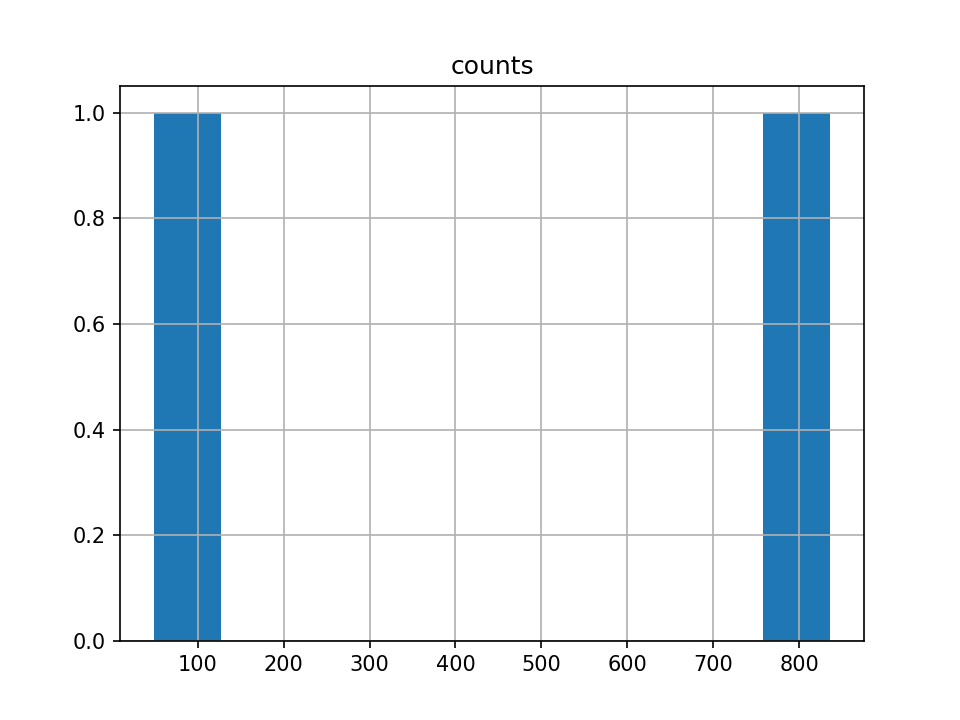

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B6FAB9B760>]],
      dtype=object)

In [12]:
# Plot here
df_by_sex.hist()

# Problem 7

How many prizes were won by those whose birth country was United States of America?

In [13]:
df_birth = df[['laureate_id', 'birth_country']].groupby('birth_country').agg('count').rename({'laureate_id':'counts'}).reset_index()
df_birth

,birth_country,laureate_id
0,Argentina,4
1,Australia,10
2,Austria,14
3,Austria-Hungary (Austria),1
4,Austria-Hungary (Bosnia and Herzegovina),1
...,...,...
116,Venezuela,1
117,Vietnam,1
118,W&uuml;rttemberg (Germany),1
119,West Germany (Germany),5


# Problem 8

Determine the age that each of the prize winners was when they won the prize. Find the youngest and oldest to win the prize. Find the mean age to win the prize, and the standard deviation of it. Make a histogram of the age each person was when they won the prize.

### Hint: You can use Pandas DatetimeIndex method to extract the year from the date format yyyy-mm-dd
> pd.DatetimeIndex(date).year

Where *date* is given in a formate like year-month-day, the above will returen the year, hence the *.year* in the call above. Use 'shit+tab' on pandas.DatetimeIndex to learn more.

# Problem 9

Make a copy of the current DataFrame. Then drop the column *lauret_id* from the copied DataFrame (do this inplace so this column is gone).

# Problem 10

Add the age column you calculated in Problem 8 to the DataFrame.